<a href="https://colab.research.google.com/github/PAULREGA/test_/blob/master/BreastCancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

#Download The Dataset
raw_df = pd.read_csv('/content/data.csv') 

In [ ]:
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
#train test split
from sklearn.model_selection import train_test_split
train_val_df, test_df = train_test_split(raw_df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_val_df, test_size=0.25, random_state= 42)

print('train_df.shape:', train_df.shape)
print('val_df.shape:', val_df.shape)
print('test_df.shape', test_df.shape)

train_df.shape: (341, 33)
val_df.shape: (114, 33)
test_df.shape (114, 33)


In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
raw_df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
217,8811779,B,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,...,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809,NaN
283,8912280,M,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,...,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630,NaN
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,...,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520,NaN
251,88518501,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,...,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,857793,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,...,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940,NaN
492,914062,M,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,...,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625,NaN
418,906024,B,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,...,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464,NaN
385,90291,M,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,...,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836,NaN


In [ ]:
#create input Columns
input_cols = list(train_df.columns)[1:-1]
target_col = 'diagnosis'
train_inputs, train_targets = train_df[input_cols].copy(), train_df[target_col].copy()
val_inputs, val_targets = val_df[input_cols].copy(), val_df[target_col].copy()
test_inputs, test_targets = test_df[input_cols].copy(), test_df[target_col].copy()

In [ ]:
from pandas.core.groupby import categorical
#identify numeric and categorical variables
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()[:-1]
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [ ]:
categorical_cols

['diagnosis']

In [ ]:
#scale numerical variables
scaler = MinMaxScaler().fit(raw_df[numeric_cols])
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [ ]:
#encode categorical variables
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(raw_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
#save the preprocessed data to the disk
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')
pd.DataFrame(train_targets).to_parquet('train_targets.parquet')
pd.DataFrame(val_targets).to_parquet('train_targets.parquet')
pd.DataFrame(test_targets).to_parquet('train_targets.parquet')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Select the columns to be used for training/prediction
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
# Generate predictions and probabilities
train_preds = model.predict(X_train)
train_probs = model.predict_proba(X_train)
accuracy_score(train_targets, train_preds)

1.0

In [ ]:
# Helper function to predict, compute accuracy & plot confustion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));    
    return preds

Accuracy: 100.00%
Accuracy: 100.00%


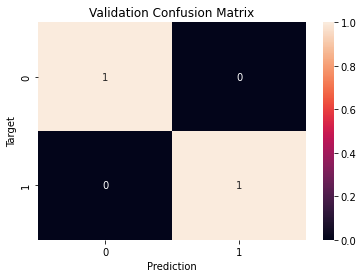

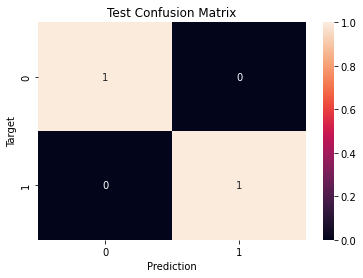

In [ ]:
# Evaluate on validation and test set
val_preds = predict_and_plot(X_val, val_targets, 'Validation')
test_preds = predict_and_plot(X_test, test_targets, 'Test')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,diagnosis_B,diagnosis_M
217,0.152350,0.262766,0.146915,0.075376,0.251964,0.121741,0.135286,0.053231,0.456566,0.277801,...,0.331823,0.124458,0.053701,0.159149,0.109061,0.153754,0.122715,0.256850,1.0,0.0
283,0.438213,0.306392,0.449243,0.280636,0.487226,0.493283,0.456420,0.449901,0.412121,0.355518,...,0.348348,0.380945,0.207875,0.431420,0.430102,0.401438,0.595189,0.237532,0.0,1.0
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.0,1.0
504,0.108240,0.106865,0.122314,0.044624,1.000000,0.627323,0.227976,0.261034,0.665657,0.949031,...,0.116205,0.092833,0.028264,0.786040,0.307371,0.167652,0.352234,0.290361,1.0,0.0
251,0.213877,0.295570,0.203787,0.111941,0.368511,0.124318,0.061809,0.102833,0.390909,0.197557,...,0.278252,0.162907,0.079557,0.311233,0.075298,0.064736,0.224880,0.231618,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0.365801,0.401759,0.357681,0.217773,0.551323,0.359242,0.302952,0.403728,0.488384,0.371104,...,0.497868,0.325166,0.196692,0.433402,0.389741,0.286502,0.630241,0.420461,0.0,1.0
492,0.521984,0.366926,0.515583,0.366278,0.428546,0.335930,0.274133,0.385785,0.533333,0.227675,...,0.374200,0.463121,0.304955,0.394440,0.199290,0.203195,0.511684,0.332348,0.0,1.0
418,0.270671,0.083192,0.256306,0.149099,0.317956,0.118275,0.055295,0.119384,0.264141,0.269377,...,0.130597,0.187808,0.093811,0.397742,0.129435,0.074960,0.282612,0.238518,1.0,0.0
385,0.360594,0.459249,0.346762,0.221082,0.308658,0.144102,0.196579,0.261978,0.286364,0.088458,...,0.524787,0.257931,0.140828,0.396421,0.126913,0.213658,0.467010,0.179775,0.0,1.0
